In [1]:
import sklearn as sk
import pandas as pd
import numpy as np
import seaborn as sns
import csv
import matplotlib.pyplot as plt

In [110]:
X_train = pd.read＿csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_test = pd.read_csv('X_test.csv')

#X_train = pd.read＿csv('train_selected_x.csv')
#X_test = pd.read_csv('test_selected_x.csv')

In [111]:
#把訓練資料的TF欄位改成01

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

X_train_names = X_train.columns

for X_train_name in X_train_names:
    A = X_train[ "%s" % (X_train_name)][0]
    #print( X_train[ "%s" % (X_train_name)][0] )
    if isinstance(A, str):
        X_train[ "%s" % (X_train_name)] = labelencoder.fit_transform(X_train[ "%s" % (X_train_name)])
        #X_train = X_train.drop(X_train_name, axis = 1)

In [112]:
#把測試資料的TF欄位改成01

X_test_names = X_test.columns

for X_test_name in X_test_names:
    A = X_test[ "%s" % (X_test_name)][0]
    #print( X_train[ "%s" % (X_train_name)][0] )
    if isinstance(A, str):
        X_test[ "%s" % (X_test_name)] = labelencoder.fit_transform(X_test[ "%s" % (X_test_name)])
        #X_test = X_test.drop(X_test_name, axis = 1)

In [113]:
#合併Y_train
X_train.insert(42,column="月租金", value=y_train)

In [114]:
# 定義判別欄位型態的函數
def Col_Types( Data ):
    Column_Types = Data.dtypes.to_frame().reset_index()   # 判別每個欄位的型態 
    Column_Types.columns = ['ColumnName','Type']
    Column_Types.sort_values( by='Type', inplace=True ) 
    return Column_Types

In [31]:
display( Col_Types(X_train) )

,ColumnName,Type
0,縣市,int64
23,有性別限制？,int64
24,性別限制,int64
25,可炊？,int64
26,可寵？,int64
27,有產權登記？,int64
28,刊登者類型,int64
29,提供家具_床？,int64
30,提供家具_桌子？,int64
22,有身份限制？,int64


In [13]:
#資料描述
display(X_train.describe())

,縣市,鄉鎮市區,最大出租所費天數,需要管理費？,月管理費,提供車位？,需要停車費？,建築類型,物件類型,所在樓層,...,提供家具_沙發？,提供家具_洗衣機？,提供家具_衣櫃？,提供家具_冰箱？,提供家具_網路？,提供家具_第四台？,提供家具_天然瓦斯？,月租金,縣市分類,陽台分類
count,49968.000000,49968.000000,49968.000000,49968.000000,49968.000000,49968.0,49968.000000,49968.000000,49968.000000,49968.000000,...,49968.000000,49968.000000,49968.000000,49968.000000,49968.000000,49968.000000,49968.000000,49968.000000,49968.000000,49968.000000
mean,15.286884,1538.242375,12.312440,0.553935,1697.457833,0.0,0.288244,1.877321,0.000600,7.717799,...,0.667867,0.678214,0.724744,0.684918,0.073127,0.062380,0.795549,31357.003062,2.709814,2.489854
std,3.032108,305.306448,8.375243,0.497088,2344.542191,0.0,0.452950,0.384574,0.024496,5.412827,...,0.470983,0.467166,0.446648,0.464553,0.260347,0.241847,0.403304,21574.401938,0.624423,0.773726
min,0.000000,3.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,-3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1350.000000,1.000000,1.000000
25%,14.000000,1400.000000,5.000000,0.000000,0.000000,0.0,0.000000,2.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,22000.000000,3.000000,2.000000
50%,16.000000,1602.000000,10.000000,1.000000,1500.000000,0.0,0.000000,2.000000,0.000000,7.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,26000.000000,3.000000,2.000000
75%,16.000000,1625.000000,18.000000,1.000000,2666.000000,0.0,1.000000,2.000000,0.000000,11.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,33000.000000,3.000000,3.000000
max,25.000000,2537.000000,98.000000,1.000000,50000.000000,0.0,1.000000,2.000000,1.000000,35.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,400000.000000,3.000000,5.000000


In [88]:
# 租金 與其他欄位間的相關係數
Corr_Matrix = X_train.corr()  # 計算相關係數
Corr = Corr_Matrix.loc['月租金',:].sort_values()[:-1]
Corr = pd.DataFrame({ '月租金':Corr })
Corr

,月租金
縣市分類,-0.465685
需要停車費？,-0.049003
提供家具_網路？,-0.040259
提供家具_第四台？,-0.034043
物件類型,-0.020966
提供家具_床？,-0.016530
可寵？,-0.008407
有性別限制？,-0.006286
性別限制,-0.005737
提供家具_沙發？,-0.000149


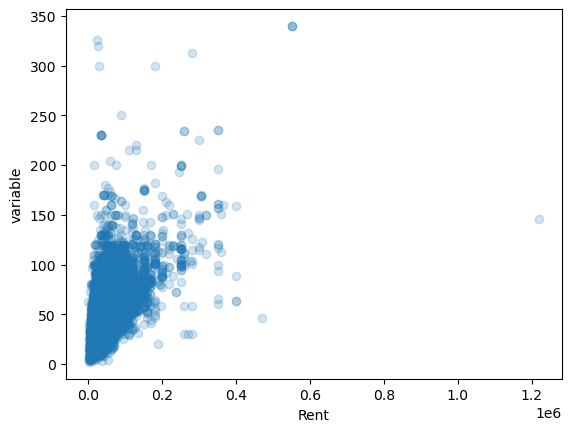

In [93]:
#檢視資料內容
plt.scatter("月租金", "坪數", data=X_train, alpha = 0.2)
plt.xlabel('Rent')
plt.ylabel('variable')
plt.show()

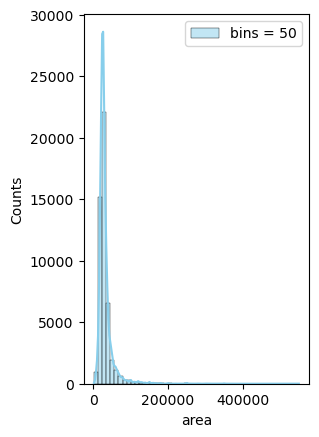

In [74]:
#檢視資料內容
plt.subplot( 1,2,1 )
sns.histplot( X_train.月租金, kde=True, bins=50, color='skyblue', label='bins = 50' )
plt.xlabel( 'area' ) 
plt.ylabel( 'Counts' ) 
plt.legend( )

In [56]:
#檢視資料內容
#X_train['提供車位？'].value_counts()

0    49985
Name: 提供車位？, dtype: int64

In [115]:
#挑掉錯誤、極值
X_train = X_train.drop(X_train[X_train['月租金']>600000].index)

In [70]:
#建立鄉鎮市區的新類別-trash
#X_train['鄉鎮市區分類'] = np.nan
#X_train.loc[X_train.鄉鎮市區<50,'鄉鎮市區分類']=1
#X_train.loc[(X_train.鄉鎮市區>=50) & (X_train.坪數<100) ,'坪數分類']=2
#X_train.loc[(X_train.坪數>=100) & (X_train.坪數<150) ,'坪數分類']=3
#X_train.loc[(X_train.坪數>=150) & (X_train.坪數<200) ,'坪數分類']=4
#X_train.loc[(X_train.坪數>=200) & (X_train.坪數<250) ,'坪數分類']=5
#X_train.loc[(X_train.坪數>=250) & (X_train.坪數<300) ,'坪數分類']=6
#X_train.loc[(X_train.坪數>=300) ,'坪數分類']=7

In [79]:
#檢視資料內容
#X_test['陽台數'].value_counts()

1     4798
2     3978
0      559
3      462
4      144
5       33
6       19
7        5
23       1
11       1
Name: 陽台數, dtype: int64

In [7]:
#挑掉錯誤、極值
#X_train = X_train.drop(X_train[X_train['物件類型']>1].index)

In [19]:
#檢視資料內容
#X_train.縣市分類.value_counts()

3.0    40063
2.0     5310
1.0     4595
Name: 縣市分類, dtype: int64

In [8]:
#挑掉錯誤、極值
#X_train = X_train.drop(X_train[X_train['縣市']==15].index)

In [116]:
#建立縣市的新類別
X_train['縣市分類'] = np.nan
X_train.loc[X_train.縣市==17,'縣市分類']=1
X_train.loc[X_train.縣市==11,'縣市分類']=2
X_train.loc[(X_train.縣市!=17) & (X_train.縣市!=11) ,'縣市分類']=3

In [117]:
#建立縣市的新類別 for test
X_test['縣市分類'] = np.nan
X_test.loc[X_test.縣市==17,'縣市分類']=1
X_test.loc[X_test.縣市==11,'縣市分類']=2
X_test.loc[(X_test.縣市!=17) & (X_test.縣市!=11) ,'縣市分類']=3

In [84]:
#檢視資料內容
#X_train.衛浴數.value_counts()

2    27154
1    18087
3     2976
4      991
5      315
0      306
6      126
7       20
8        4
9        1
Name: 衛浴數, dtype: int64

In [118]:
#調整衛浴資料
X_train.loc[X_train.衛浴數>7,'衛浴數']=2

In [119]:
X_test.loc[X_test.衛浴數>7,'衛浴數']=2

In [69]:
#檢視資料內容
#X_train.月管理費.value_counts()

0       22300
2000     4535
3000     3540
2500     1695
1500      708
        ...  
3577        1
1843        1
5461        1
3057        1
9019        1
Name: 月管理費, Length: 3138, dtype: int64

In [120]:
#挑掉錯誤、極值
X_train = X_train.drop(X_train[X_train['月管理費']>X_train['月租金']].index)

In [63]:
#檢視資料內容
#X_test.所在樓層.value_counts()

 3     866
 4     795
 6     730
 2     725
 5     709
 0     683
 9     665
 8     652
 7     628
 10    507
 12    499
 11    491
 13    418
 14    344
 15    295
 1     264
 17    120
 16    119
 18     98
 20     87
 19     62
 22     50
 21     45
 23     35
 24     27
 25     20
 27     18
 26     18
 28     10
 29      9
-1       4
 30      3
-3       1
 31      1
 33      1
 35      1
Name: 所在樓層, dtype: int64

In [121]:
#挑掉錯誤、極值
X_train = X_train.drop(X_train[X_train['所在樓層']>40].index)
X_train = X_train.drop(X_train[X_train['所在樓層']<(-6)].index)

In [79]:
#檢視資料內容
X_train.陽台數.value_counts()

1     23536
2     19838
0      3207
3      2334
4       686
5       228
6       121
7        16
11        5
9         2
14        1
8         1
10        1
Name: 陽台數, dtype: int64

In [12]:
#挑掉錯誤、極值
#X_train = X_train.drop(X_train[X_train['陽台數']>200].index)

In [122]:
#調整陽台數
X_train.loc[X_train.陽台數>6,'陽台數']=2

In [123]:
X_test.loc[X_test.陽台數>6,'陽台數']=2

In [14]:
#FeatureImportance
from sklearn.ensemble import RandomForestRegressor
DTC = RandomForestRegressor()
# 自變數、應變數進行擬合
DTC.fit( X_train, X_train.月租金 )

# 排序特徵重要性(由大到小)
col_names = X_train.columns
importances = DTC.feature_importances_
Feature_Rank = pd.DataFrame( { 'Feature_Name':col_names, 'Importance':importances } )
Feature_Rank.sort_values( by='Importance', ascending=False, inplace=True ) 
Feature_Rank

,Feature_Name,Importance
42,月租金,9.985586e-01
4,月管理費,7.056996e-04
12,坪數,5.398760e-04
13,陽台數,2.686960e-05
11,距頂樓層數,2.582075e-05
10,建物樓高,1.669084e-05
1,鄉鎮市區,1.469465e-05
9,所在樓層,1.393999e-05
36,提供家具_洗衣機？,1.267656e-05
2,最大出租所費天數,1.108351e-05


In [124]:
#FeatureSelection
Droplist = ['性別限制','有性別限制？','提供車位？'
           ,'額外費用_瓦斯？','額外費用_水費？','額外費用_網路？','可炊？'
           ,'額外費用_第四台？','有身份限制？','提供家具_熱水器？','提供家具_天然瓦斯？'
           ,'提供家具_第四台？','提供家具_網路？','可寵？']
X_train = X_train.drop(Droplist , axis=1)

SelectedFeature = list(X_train.columns)
SelectedFeature.remove('月租金')
SelectedFeature

['縣市',
 '鄉鎮市區',
 '最大出租所費天數',
 '需要管理費？',
 '月管理費',
 '需要停車費？',
 '建築類型',
 '物件類型',
 '所在樓層',
 '建物樓高',
 '距頂樓層數',
 '坪數',
 '陽台數',
 '衛浴數',
 '房數',
 '客廳數',
 '額外費用_電費？',
 '有產權登記？',
 '刊登者類型',
 '提供家具_床？',
 '提供家具_桌子？',
 '提供家具_椅子？',
 '提供家具_電視？',
 '提供家具_冷氣？',
 '提供家具_沙發？',
 '提供家具_洗衣機？',
 '提供家具_衣櫃？',
 '提供家具_冰箱？',
 '縣市分類']

In [125]:
#訓練
from sklearn.ensemble import RandomForestRegressor

# 建立 Random Forest Regressor 模型
RF = RandomForestRegressor(n_estimators=600, min_samples_leaf = 1, random_state=1)
# 使用訓練資料訓練模型
RF.fit( X_train[SelectedFeature], X_train.月租金)

RandomForestRegressor(n_estimators=600, random_state=1)

In [126]:
# 沒有標準化的預測成功的比例
print("訓練集:" , RF.score(X_train[SelectedFeature],X_train.月租金))

訓練集: 0.9818887647435836


### record
2 什麼都沒做, 300,40 0.97188942  
4 去掉月租金的極值&分類縣市, 300,40, 0.981932

In [127]:
Droplist = ['性別限制','有性別限制？','提供車位？'
           ,'額外費用_瓦斯？','額外費用_水費？','額外費用_網路？','可炊？'
           ,'額外費用_第四台？','有身份限制？','提供家具_熱水器？','提供家具_天然瓦斯？'
           ,'提供家具_第四台？','提供家具_網路？','可寵？']
X_test = X_test.drop(Droplist , axis=1)

In [128]:
predicted = RF.predict(X_test[SelectedFeature])

In [130]:
# 整理預測結果資料格式
predicted = pd.DataFrame(predicted)
predicted.index = predicted.index +1
predicted.insert(0, column="INDEX", value=predicted.index)
predicted.columns=['INDEX', 'RENT']

In [131]:
predicted.to_csv("R11725045_李名涵_RF6008.csv", index = False)

In [38]:
# 資料標準化
#from sklearn import preprocessing
#建立MinMaxScaler物件
#minmax = preprocessing.MinMaxScaler()
# 資料標準化
#X_train2 = minmax.fit_transform(X_train)

In [39]:
#X_test2 = minmax.fit_transform(X_test)

In [48]:
#Adaboost
#from sklearn.ensemble import AdaBoostRegressor
#from sklearn.tree import DecisionTreeRegressor
#bdt = AdaBoostRegressor(DecisionTreeRegressor(max_depth=40, min_samples_split=20, min_samples_leaf=1)
                         ,loss='square',n_estimators=300)
#bdt.fit(X_train[SelectedFeature], X_train.月租金)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=40,
                                                  min_samples_split=20),
                  loss='square', n_estimators=300)

In [49]:
# Adaboost的預測成功的比例
#print ("訓練集:", bdt.score(X_train[SelectedFeature], X_train.月租金))

訓練集: 0.9255005010743143


In [50]:
#predictedada = bdt.predict(X_test[SelectedFeature])

In [51]:
# 整理預測結果資料格式
#predictedada = pd.DataFrame(predictedada)
#predictedada.index = predictedada.index +1
#predictedada.insert(0, column="INDEX", value=predictedada.index)
#predictedada.columns=['INDEX', 'RENT']

In [52]:
#predictedada.to_csv("R11725045_李名涵_ada1.csv", index = False)